# Introduction to Deep Learning

## Objectives
In this lab, you will embark on the journey of creating a ANN, DNN model tailored for predicting the total expenditure of potential consumers based on various characteristics. As a vehicle salesperson, your goal is to develop a model that can effectively estimate the overall spending potential.

Your task is to build and train an ANN/DNN model using tensorflow in a Jupyter notebook.

Feel Free to Explore the dataset, analyze its contents, and derive meaningful insights. Additionally, feel empowered to create insightful visualizations that enhance the understanding of the data. 

# Step 1: Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler


# Step 2: Load and Explore the Data

In [2]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [7]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [10]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [11]:
df.shape

(500, 9)

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [9]:
df.duplicated().sum()

0

In [167]:
df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [3]:
df.value_counts

<bound method DataFrame.value_counts of        customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit

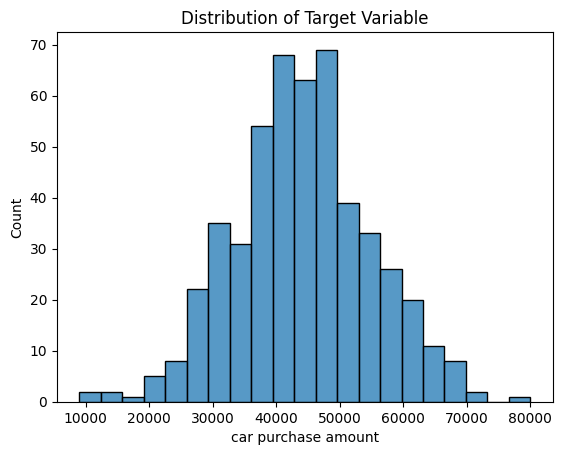

In [19]:
sns.histplot(x='car purchase amount', data=df)
plt.title('Distribution of Target Variable')
plt.show()

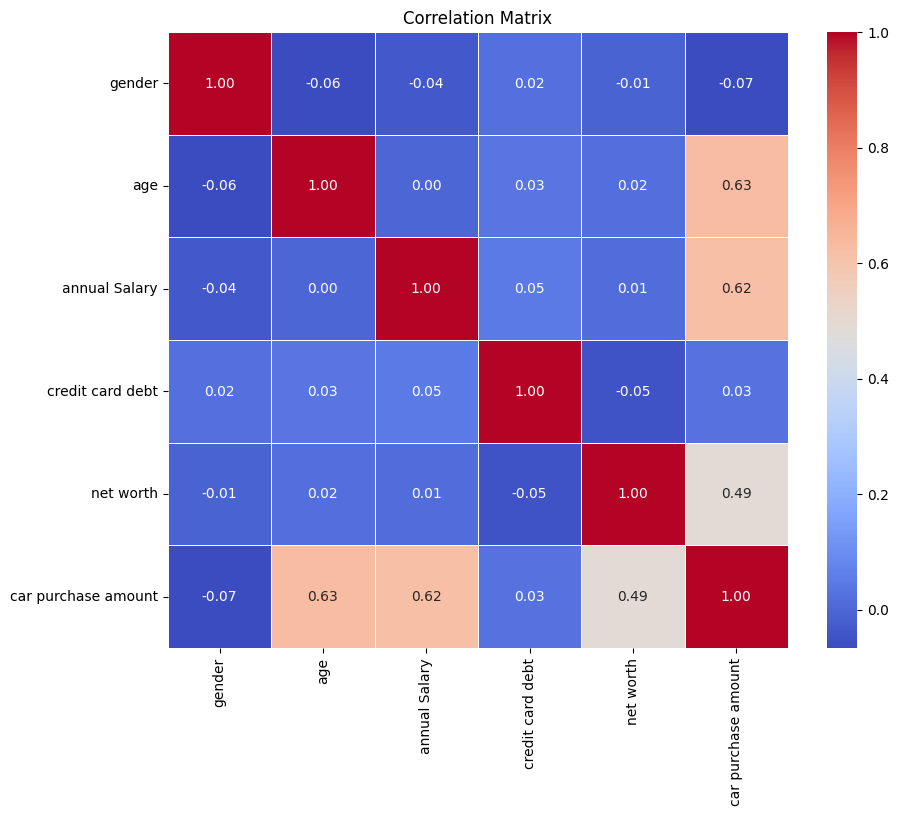

In [20]:
corr_matrix = df.drop(["customer name", "customer e-mail", "country"], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 3: Data Cleaning and Preprocessing
 Hint: You could use a StandardScaler() or MinMaxScaler()



In [171]:
df['age'] = df['age'].astype(int)
print(df.dtypes)

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                      int64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


In [21]:
country_encoder = LabelEncoder() # Encode Object/str feature
df["country"] = country_encoder.fit_transform(df["country"])
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


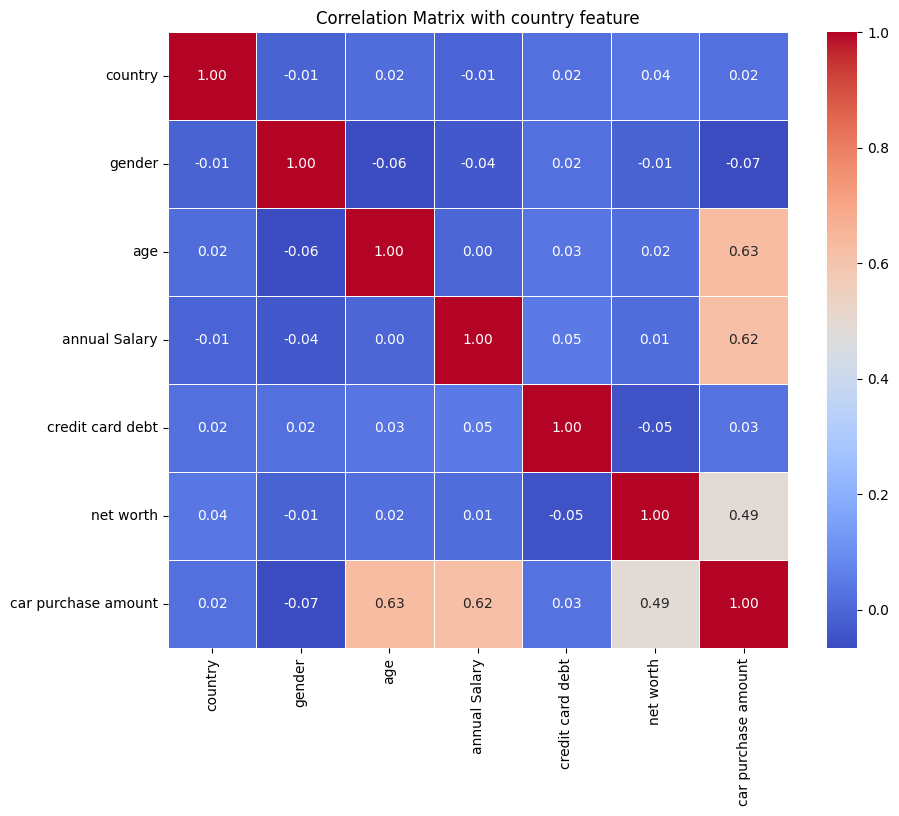

In [22]:
'''
categorical_columns = ['customer name', 'customer e-mail', 'country']
dummy_columns = pd.get_dummies(df[categorical_columns])

df = pd.concat([df, dummy_columns], axis=1)

df = df.drop(categorical_columns, axis=1)
'''

# Revisualize heatmap with country feature
corr_matrix = df.drop(["customer name", "customer e-mail"], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with country feature')
plt.show()

In [26]:
X = df.drop(["customer name", "customer e-mail", "car purchase amount"], axis=1)
y = df["car purchase amount"]

In [27]:
print(df.dtypes)

customer name           object
customer e-mail         object
country                  int64
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


In [33]:
scaler = StandardScaler() # Scaling a X (input feature)
X = scaler.fit_transform(X)

In [31]:
'''
s = MinMaxScaler()
df[numeric] = s.fit_transform(df[numeric])
df
'''

'\ns = MinMaxScaler()\ndf[numeric] = s.fit_transform(df[numeric])\ndf\n'

In [133]:
'''
numeric = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

s = StandardScaler()
df[numeric] = s.fit_transform(df[numeric])
df
'''

"\nnumeric = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']\n\ns = StandardScaler()\ndf[numeric] = s.fit_transform(df[numeric])\ndf\n"

# Step 4: Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the Artifical Neural Network Model

In [37]:
model = Sequential() # Define Sequential Model

# Define Input, Hidden layer
model.add(Dense(units= 1024, activation='linear' , input_dim=X_train.shape[1]))

# Define Output layer
model.add(Dense(units= 1, activation='linear'))  # Use linear activation for regression

# Choosing Optimizer and loss function
model.compile(optimizer='adam', loss='MSE')


### Clarify Your Artificial Neural Network (ANN) Model, Optimization, and Loss Function Choices and justify

Input Layer: Appropriate, with units equal to the number of features.

Hidden Layer: Linear activation is suitable for regression.

Output Layer: with one unit and a linear activation for regression.

Optimizer: Adam is a widely used and effective choice and fast.

Loss Function: MSE is appropriate for regression tasks.

Justification: Regression is suitable for predicting car purchase amounts with continuous features.



# Step 6: Train the Model


In [ ]:
h = model.fit(X_train, y_train, epochs=3500, batch_size=128, validation_split=0.2)

#model.fit(tensor, y_train, epochs=100, batch_size=32 , validation_split=0.2)

Epoch 1/3500
3/3 [==============================] - 1s 89ms/step - loss: 2076190080.0000 - val_loss: 1938718976.0000
Epoch 2/3500
3/3 [==============================] - 0s 23ms/step - loss: 2076171904.0000 - val_loss: 1938708096.0000
Epoch 3/3500
3/3 [==============================] - 0s 20ms/step - loss: 2076153600.0000 - val_loss: 1938696448.0000
Epoch 4/3500
3/3 [==============================] - 0s 22ms/step - loss: 2076133632.0000 - val_loss: 1938683136.0000
Epoch 5/3500
3/3 [==============================] - 0s 20ms/step - loss: 2076112256.0000 - val_loss: 1938667776.0000
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 2076089344.0000 - val_loss: 1938651520.0000
Epoch 7/3500
3/3 [==============================] - 0s 29ms/step - loss: 2076064768.0000 - val_loss: 1938632960.0000
Epoch 8/3500
3/3 [==============================] - 0s 19ms/step - loss: 2076036736.0000 - val_loss: 1938612608.0000
Epoch 9/3500
3/3 [==============================] - 0s 18ms/step

# Step 7: Evaluate the Model

In [42]:
y_pred = model.predict(X_test)

# Evaluation with different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 2.0956651935959094
Mean Absolute Error (MAE): 1.16260636875013
R-squared (R2): 0.999999980590869


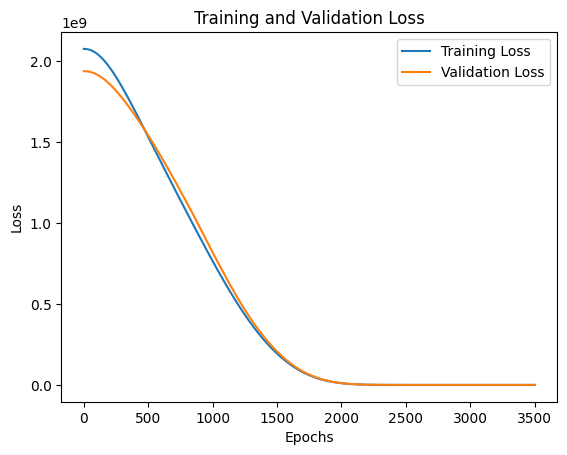

In [43]:
# Extract training and validation loss from the h object
train_loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Step 8: Build the Deep Neural Network Model

In [44]:

model = Sequential() # Define Sequential Model

# Define Input, Hidden layer
model.add(Dense(units= 2048, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(units= 1024, activation='linear'))
model.add(Dense(units= 512, activation='linear'))
model.add(Dense(units= 256, activation='linear'))
model.add(Dense(units= 128, activation='linear'))

# Define Output layer
model.add(Dense(units= 1, activation='linear'))  # Use linear activation for regression

# Choosing Optimizer and loss function
model.compile(optimizer='adam', loss='MSE')

### Clarify Your Deep Neural Network (DNN) Model, Optimization, and Loss Function Choices and justify 

Input Layer: Appropriate, with units equal to the number of features.

Hidden Layer: Linear activation is suitable for regression with more than 5 hidden layer.

Output Layer: with one unit and a linear activation for regression.

Optimizer: Adam is a widely used and effective choice and fast.

Loss Function: MSE is appropriate for regression tasks.

Justification: Regression is suitable for predicting car purchase amounts with continuous features.

# Step 9: Train the Model

In [45]:
h = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 216ms/step - loss: 2076098176.0000 - val_loss: 1938473984.0000
Epoch 2/100
3/3 [==============================] - 0s 84ms/step - loss: 2074437248.0000 - val_loss: 1936626688.0000
Epoch 3/100
3/3 [==============================] - 0s 85ms/step - loss: 2065989888.0000 - val_loss: 1927711360.0000
Epoch 4/100
3/3 [==============================] - 0s 82ms/step - loss: 2035993600.0000 - val_loss: 1897184896.0000
Epoch 5/100
3/3 [==============================] - 0s 83ms/step - loss: 1946788224.0000 - val_loss: 1826077696.0000
Epoch 6/100
3/3 [==============================] - 0s 116ms/step - loss: 1767562240.0000 - val_loss: 1737870976.0000
Epoch 7/100
3/3 [==============================] - 0s 129ms/step - loss: 1526615808.0000 - val_loss: 1746609536.0000
Epoch 8/100
3/3 [==============================] - 0s 102ms/step - loss: 1427140736.0000 - val_loss: 1450226944.0000
Epoch 9/100
3/3 [==============================] - 0s 109ms/step - l

# Step 10: Evaluate the Model

In [46]:
y_pred = model.predict(X_test)

# Evaluation with different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 6ms/step
Mean Squared Error (MSE): 2.1104616891649046
Mean Absolute Error (MAE): 1.1509537125000497
R-squared (R2): 0.9999999804538304


# Step 11: Evaluate and Compare Scores, Training Time, and Prediction Time of ANN/DNN Models

In [49]:
import time

start_time = time.time()

ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_training_time = time.time() - start_time

start_time = time.time()

dnn_predictions = dnn_model.predict(X_test)
dnn_accuracy = accuracy_score(y_test, dnn_predictions)
dnn_mse = mean_squared_error(y_test, dnn_predictions)
dnn_training_time = time.time() - start_time

print("ANN Model:")
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"MSE: {ann_mse:.4f}")
print(f"Training Time: {ann_training_time:.2f} seconds")
print("")

print("DNN Model:")
print(f"Accuracy: {dnn_accuracy:.4f}")
print(f"MSE: {dnn_mse:.4f}")
print(f"Training Time: {dnn_training_time:.2f} seconds")

NameError: name 'ann_model' is not defined